# SI618 Lab 9

In this lab, we will be working with three different datasets

1. The UCI data set about wine quality from lab 8. The dataset comes from https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009
2. Selected gender inequality related data from global development database downloaded from the World Bank data bank (https://databank.worldbank.org/reports.aspx?source=world-development-indicators#). Read the metadata file for more information about the two variables being used.
3. A monthly time series dataset of the number of domestic airline passengers (in 000s) in the United States collected from https://www.transtats.bts.gov/TRAFFIC/

## Part 1: Wine Quality

### Question 1: (15 points) Load the wine quality dataset. Define a new column **isgood** based on the **quality** column with wines with a quality rating higher than 5 being *good* and the rest being *bad*. 
  * Use a JointGrid approach look at the relationship between sulphates and alcohol.
  * Look at the same relationship separately for *good* and *bad* wines with separate JointGrids
  * What do you observe? 

Hint: When appropriate, create additional figures that allow you to exclude the effect of outliers


In [1]:
import pandas as pd
import numpy as np
wine = pd.read_csv('winequality-red.csv')
wine['isgood'] = np.where(wine['quality'] > 5, 'good', 'bad')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,isgood
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,bad


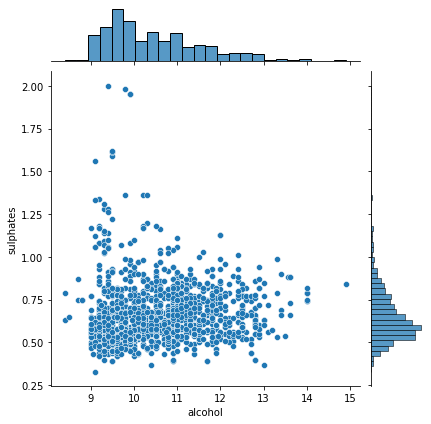

In [2]:
import seaborn as sns
g = sns.JointGrid(data=wine, x="alcohol", y="sulphates")
g.plot(sns.scatterplot, sns.histplot)

From the above plot we cannot find obvious trend between sulphates and alcohol. Therefore we want to remove outliers from the table.

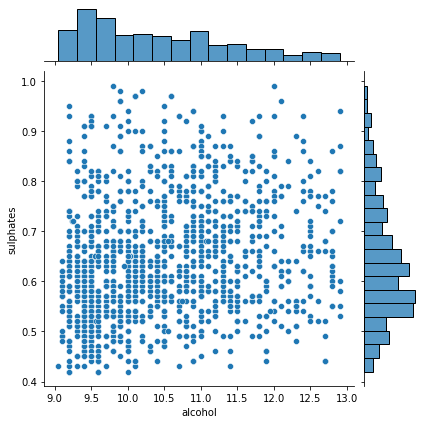

In [3]:
wine_remove = wine[(wine['alcohol'] < 13) & (wine['alcohol'] > 9) & (wine['sulphates'] < 1) & (wine['sulphates'] > 0.4)]
g = sns.JointGrid(data=wine_remove, x="alcohol", y="sulphates")
g.plot(sns.scatterplot, sns.histplot)

<ipython-input-4-73174e80e442>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  g = sns.JointGrid(data=wine_remove[wine["isgood"] == "good"], x="alcohol", y="sulphates")


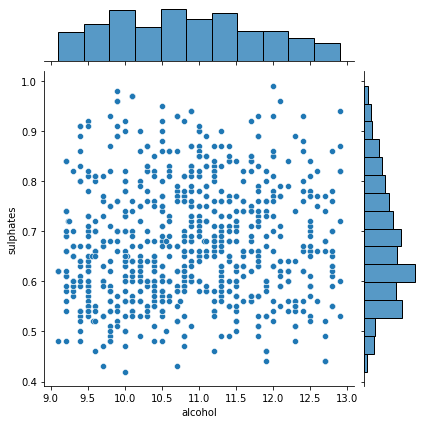

In [4]:
g = sns.JointGrid(data=wine_remove[wine["isgood"] == "good"], x="alcohol", y="sulphates")
g.plot(sns.scatterplot, sns.histplot)

<ipython-input-5-5b87343be183>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  g = sns.JointGrid(data=wine_remove[wine["isgood"] == "bad"], x="alcohol", y="sulphates")


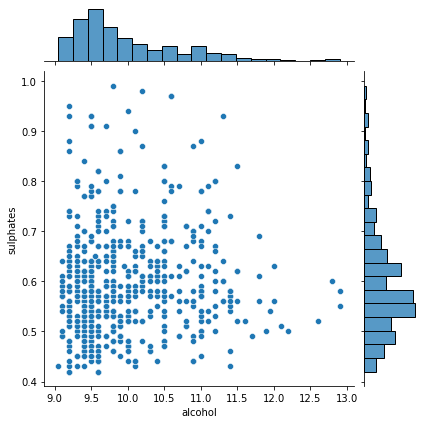

In [5]:
g = sns.JointGrid(data=wine_remove[wine["isgood"] == "bad"], x="alcohol", y="sulphates")
g.plot(sns.scatterplot, sns.histplot)

After removing the outliers of from the table, we can notice there is a slight positive relationship between sulphates and alcohol. For good wines, the positive relationship demonstrates more clearly. For bad wines, such a positive trend can hardly be indentified from the plot. 

### Question 2: (15 points) Use OLS to perform either a regression or an ANOVA for the relationship between sulphates with (i) categorical variable of wine quality and (ii) original quality. Interpret your results.

In [6]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

model = smf.ols('sulphates ~ isgood', data=wine).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table


,sum_sq,df,F,PR(>F)
isgood,2.183486,1.0,79.73768,1.147929e-18
Residual,43.731235,1597.0,NaN,NaN


In [7]:
model = smf.ols('sulphates ~ quality', data=wine).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
quality,2.901833,1.0,107.740433,1.802088e-24
Residual,43.012888,1597.0,NaN,NaN


From the first anova tables, we can find that the p-value is very small. Therefore, we can conclude that there is evidence to reject the null hypothesis that the means of of sulfates for good and bad wines are the same. Namely, the means of sulfates are different for good and bad wines. <br>

For the second anova table, similary we have a very small p-value. Therefore, the means of sulfates are different for wines of different qualities.

## Part 2: Trends in Gender Inequality

### Question 3: (15 points) Visualize the relationship between the representation of women in the parliment (**SG.GEN.PARL.ZS**) and the legal and regulatory support for providing economic opportunities for women (**SG.LAW.INDX**) in the year 2020 using a scatter plot drawn with plotnine (*geom_point*). Then overlay a linear regression fit with the standard error confidence intervals on the same plot (*geom smooth*). Remember to label and resize the figure as necessary to make it readable. What do you observe?   

In [8]:
!pip install plotnine

D:\Software\anaconda3\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 1 rows containing missing values.


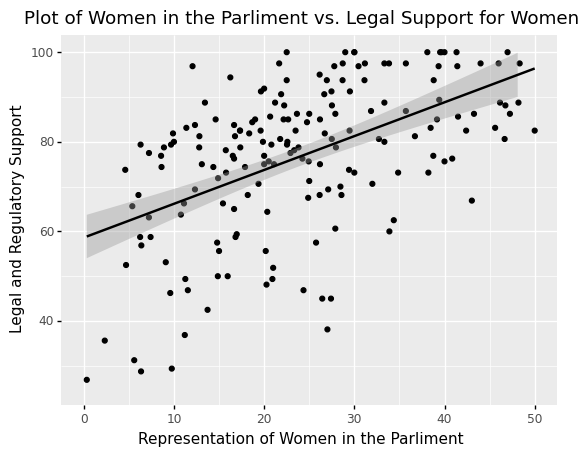

<ggplot: (200505677472)>

In [9]:
from plotnine import ggplot, geom_point, aes, geom_line, ggtitle, geom_smooth, xlab, ylab, xlim, ylim

gender_df = pd.read_csv('gender_world_development.csv')
gender_df['2020 [YR2020]'] = gender_df['2020 [YR2020]'].fillna(0)
par_df = gender_df[gender_df['Series Code'] == 'SG.GEN.PARL.ZS']
law_df = gender_df[gender_df['Series Code'] == 'SG.LAW.INDX']
merge_df = par_df.merge(law_df, on="Country Name")
merge_df = merge_df[(merge_df['2020 [YR2020]_x'] != 0) & (merge_df['2020 [YR2020]_y'] != 0)]

ggplot(merge_df, aes(x='2020 [YR2020]_x', y='2020 [YR2020]_y')) + geom_point() + geom_smooth(method='lm', se=True) + ggtitle('Plot of Women in the Parliment vs. Legal Support for Women') + xlab("Representation of Women in the Parliment") + ylab('Legal and Regulatory Support') + xlim(0, 50) + ylim(25, 100)


From the above plot, we can observe that there is a positive relationship between the legal and regulatory support for providing economic opportunities for women and the representation of women in the Parliment. 

### Question 4: (10 points) Visualize the evolution of the proportion of women in the legislature in the United States over the years using a line plot

Hint: You can use the pandas *melt* function to convert columns to rows

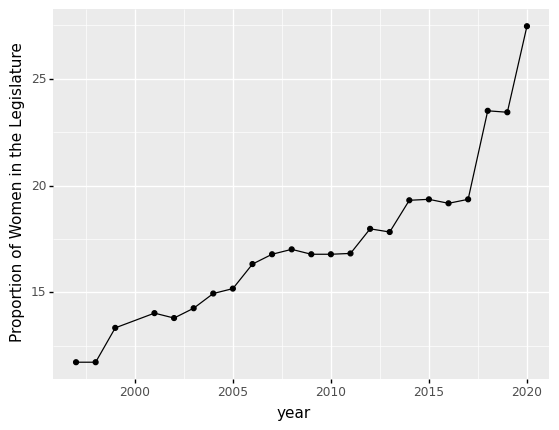

<ggplot: (200505732503)>

In [10]:
us_df = gender_df[(gender_df['Country Name'] == 'United States') & (gender_df['Series Code'] == 'SG.GEN.PARL.ZS')]
us_df = us_df.dropna(axis = 1, how = 'all')
us_df = us_df.drop(['Unnamed: 0', 'Country Name', 'Country Code', 'Series Name', 'Series Code'], axis = 1)
us_df = pd.melt(us_df)
year = pd.Series([int(str.split()[0]) for str in us_df['variable']])
ggplot(us_df, aes(year, 'value')) + geom_line(aes(group = 1)) + geom_point() + xlab('year') + ylab('Proportion of Women in the Legislature')

### Question 5: (20 points) Create the visualization from Q4 for the 10 most populus countries in the world (China, India, US, Indonesia, Pakistan, Brazil, Nigeria, Bangladesh, Russia, Mexico) using a facet grid from plotnine. Remember to format the figure for reability. What are your observations?

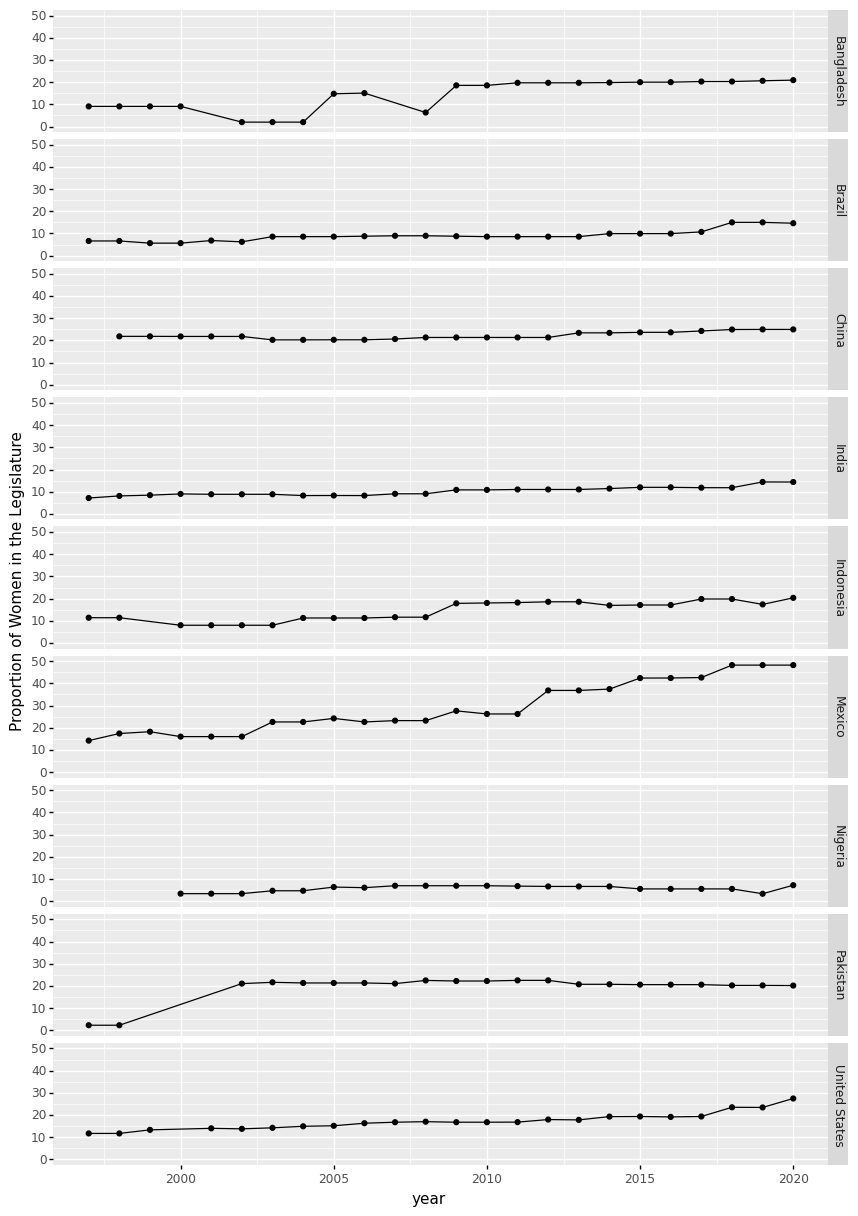

<ggplot: (200515598005)>

In [13]:
from plotnine import facet_grid, labs, theme
populus_df = gender_df[gender_df['Country Name'].isin(['China', 'India', 'United States', 'Indonesia', 'Pakistan', 'Brazil', 'Nigeria', 'Bangladesh', 'Russia', 'Mexico'])]
populus_df = populus_df[populus_df['Series Code'] == 'SG.GEN.PARL.ZS']
populus_df = populus_df.drop(['Unnamed: 0', 'Country Code', 'Series Name', 'Series Code'], axis = 1)
populus_df = pd.melt(populus_df, id_vars = 'Country Name')
populus_df = populus_df.dropna(axis = 0)
populus_df['year'] = [int(str.split()[0]) for str in populus_df['variable']]
ggplot(populus_df, aes(x='year', y='value')) + geom_point() + geom_line() + facet_grid('Country Name ~ .')+ labs(x='year', y='Proportion of Women in the Legislature') + theme(figure_size=(10, 15)) + ylim(0, 50)

Overall speaking, all the countries has experienced an increase in the women's proportion in the legislature. <br>
Bangladesh has a large fluctuation in women's proportion in the legislature in early years and the proportion remains stable in recent years. <br>
Pakistan has a sharp increse around 2000 and there isn't much change to the proportion in the years after 2000. <br>
Countries like the Brazil, China, India, Indonesia and Nigeria have a slight increase in the proportion over the years, where China maintains a larger proportion than others. <br>
Countires like Mexico and United States have experienced a noticable increase in the proportion of women in the legislature, where Mexico has the largest proportion among all the countries investigated.

## Part 3: Domestic Air Travel in the United States

### Question 6: (10 points) Load the airline passenger dataset. Using plotnine, visualize the monthly time series of the number of domestic passengers with overlayed point and line plots. Format and label the plot to be readable.

Hint: You can use the mizani package to generate the axis breaks and formatted labels

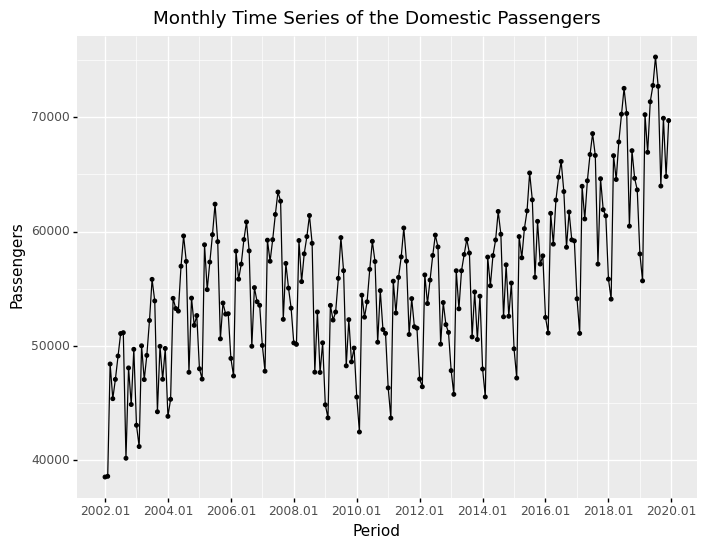

<ggplot: (8777563586337)>

In [95]:
from plotnine import geom_smooth, stat_summary, scale_x_datetime
from mizani.breaks import date_breaks
from mizani.formatters import date_format
from datetime import date


airline_df = pd.read_csv('us_domestic_airline_passengers.csv')
airline_df['Period'] = pd.to_datetime(airline_df['Period'])
airline_df['month'] = airline_df['Period'].dt.month
airline_df['year'] = airline_df['Period'].dt.year

ggplot(airline_df, aes('Period', 'Passengers')) + ggtitle("Monthly Time Series of the Domestic Passengers") + geom_line() + geom_point(size=1) + theme(figure_size=(8, 6)) + scale_x_datetime(breaks=date_breaks('2 years'), labels=date_format('%Y.%m'))

### Question 7: (15 points) Remove the monthly seasonal effect from the passenger time series and plot the adjusted passenger (mean + residual) time series. What do you observe? 

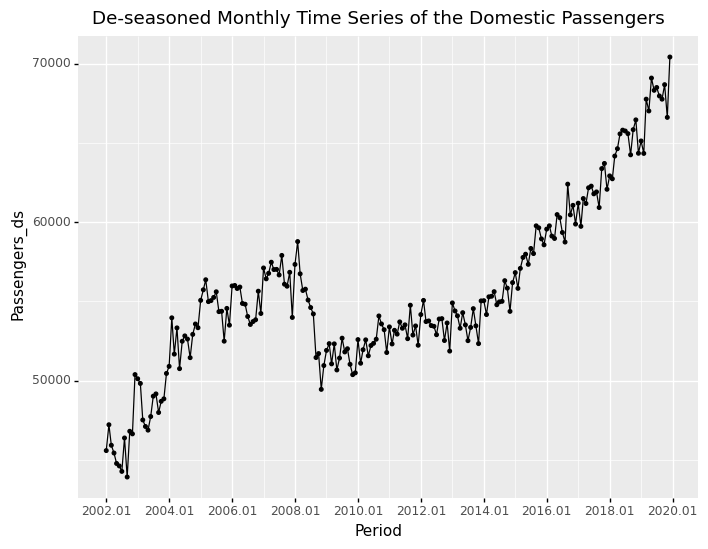

<ggplot: (8777535683893)>

In [101]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

model7 = smf.ols('Passengers ~ C(month)', data=airline_df).fit()
airline_df['Passengers_ds'] = model7.resid + airline_df['Passengers'].mean()

ggplot(airline_df, aes('Period', 'Passengers_ds')) + ggtitle("De-seasoned Monthly Time Series of the Domestic Passengers") + geom_line() + geom_point(size=1) + theme(figure_size=(8, 6)) + scale_x_datetime(breaks=date_breaks('2 years'), labels=date_format('%Y.%m'))

After removing the seasoning pattern using linear model, we can see that for there is an overall increasing trend in the number of passengers over the years. For the time around 2008, the number of passengers has a sharp decrease. 

## What to submit

* The jupyter notebook file named 'uniquename_si618_lab9_.ipynb'
* The HTML or PDF report generated by your notebook file that should similar to si618_lab9_solution.html